In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
X,y = make_blobs(n_samples=1000,n_features=2,centers=7,cluster_std=1,random_state=82)

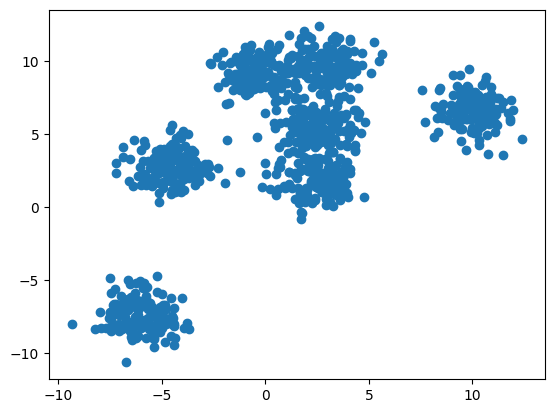

In [2]:
plt.scatter(X[:,0],X[:,1])

In [3]:
from kmeans_clustering import KMeans

In [4]:
kmeans_random = KMeans(n_clusters=7,n_init=1,init="random",max_iter=300)
kmeans_random.fit(X)
result_random = []
inertia = []
for i in range(1000):
    kmeans_random.fit(X)
    inertia.append(round(kmeans_random.inertia_,10))
    if round(kmeans_random.inertia_,2) == round(1942.4301026157043,2):
        result_random.append(1)
    else:
        result_random.append(0)
print(np.unique(result_random,return_counts=True))
print(np.unique(inertia,return_counts=True))

(array([0, 1]), array([621, 379]))
(array([ 1942.43010262,  2645.29635753,  2645.42256884,  2651.6286225 ,
        2651.64632964,  2651.699914  ,  2651.70610844,  2651.71762113,
        2652.4984968 ,  2652.54491102,  2652.56978829,  2652.61620251,
        2657.7174646 ,  2657.72386451,  2657.7887561 ,  2657.79495054,
        2657.795156  ,  2658.6232592 ,  2658.64096634,  2659.4931335 ,
        2659.53954772,  2662.15725506,  2662.3718565 ,  2662.38307835,
        2662.45436984,  2662.46056428,  2662.58410442,  2662.62210659,
        2662.65539591,  2662.69339808,  2662.75232093,  2662.77954087,
        2662.85447713,  2662.92328077,  2662.92576862,  2662.93189823,
        2662.93987507,  2663.00318972,  2663.00318972,  2663.58411931,
        2664.7121013 ,  2664.71850121,  2666.95336611,  2666.96439187,
        2666.98633981,  2666.98633982,  2667.02075002,  2667.02427838,
        2667.0246576 ,  2667.0314287 ,  2667.03568336,  2667.05763131,
        2667.0776441 ,  2667.14893559,  2

In [5]:
kmeans_plus = KMeans(n_clusters=7,n_init=1,init="k-means++",max_iter=300)
result_plus = []
inertia = []
for i in range(1,1001):

    kmeans_plus.fit(X)

    inertia.append(round(kmeans_plus.inertia_,9))

    if round(kmeans_plus.inertia_,2) == round(1942.4301026157043,2):
        result_plus.append(1)
    else:
        result_plus.append(0)
    
print(np.unique(result_plus,return_counts=True))
print(np.unique(inertia,return_counts=True))

(array([0, 1]), array([547, 453]))
(array([1942.43010262, 2645.42256885, 2651.6286225 , 2651.64632964,
       2651.68498066, 2651.69991399, 2651.70610844, 2651.71762113,
       2652.54491102, 2652.56978829, 2652.61620251, 2657.7174646 ,
       2657.72386451, 2657.78875609, 2657.795156  , 2657.80135044,
       2658.6232592 , 2658.64096634, 2659.4931335 , 2659.53954772,
       2662.15725506, 2662.3718565 , 2662.38307834, 2662.44314799,
       2662.45436984, 2662.58410442, 2662.62210659, 2662.65539591,
       2662.69339808, 2662.7419336 , 2662.77334643, 2662.85447713,
       2662.92328077, 2662.92576862, 2662.93189823, 2662.93987507,
       2663.01116656, 2663.57838635, 2663.58411931, 2664.7121013 ,
       2664.71850121, 2666.95336611, 2666.96439187, 2666.98633982,
       2667.0246576 , 2667.03568336, 2667.0418778 , 2667.05763131,
       2667.0776441 , 2667.14893559, 2667.43198031, 2667.48710132,
       2667.5032718 , 2667.57321263, 2667.64450412, 2667.85417618,
       2667.92546767, 2669

C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_12448\4286432222.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_12448\4286432222.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])


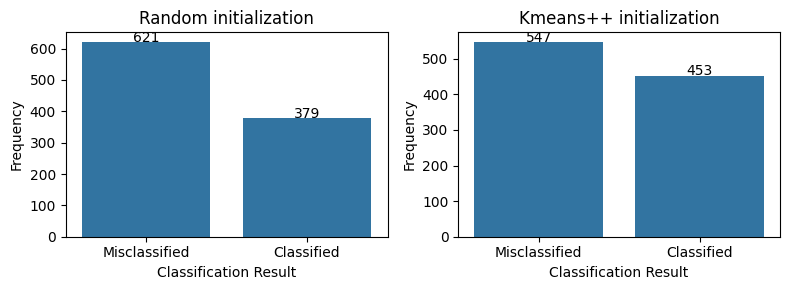

In [6]:
label_map = {'0': 'Misclassified', '1': 'Classified'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(x=result_random, ax=ax1)
ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
ax1.set_xlabel("Classification Result")
ax1.set_ylabel("Frequency")
ax1.set_title("Random initialization")
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

sns.countplot(x=result_plus, ax=ax2)
ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])
ax2.set_xlabel("Classification Result")
ax2.set_ylabel("Frequency")
ax2.set_title("Kmeans++ initialization")
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

plt.tight_layout()
plt.show()


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans_random = KMeans(n_clusters=7,n_init=1,init="random",max_iter=300)
kmeans_random.fit(X)
result_random = []
inertia = []
for i in range(1000):
    kmeans_random.fit(X)
    inertia.append(round(kmeans_random.inertia_,10))
    if round(kmeans_random.inertia_,2) == round(1942.4301026157043,2):
        result_random.append(1)
    else:
        result_random.append(0)
print(np.unique(result_random,return_counts=True))


(array([0, 1]), array([820, 180]))


In [9]:
print(np.unique(inertia,return_counts=True))

(array([1942.43010262, 1942.47593156, 1942.49489423, 1942.51067252,
       1942.55200224, 1942.56701297, 1942.6192753 , 1942.64252218,
       1942.68689482, 1942.71489679, 1942.75338126, 1942.7671281 ,
       1942.83626739, 1942.83942394, 1942.94402398, 1942.95473878,
       1943.10202341, 1943.18985385, 1943.19317998, 1943.20426979,
       2643.84579907, 2645.48091012, 2647.04158113, 2651.6286225 ,
       2651.64632964, 2651.68498066, 2651.699914  , 2651.71762113,
       2652.56978829, 2652.57736419, 2652.61620251, 2657.7174646 ,
       2657.72386451, 2657.78022266, 2657.7887561 , 2657.795156  ,
       2658.6232592 , 2658.64096634, 2658.66144696, 2658.67686653,
       2658.71033218, 2658.71820217, 2658.80002348, 2658.81773062,
       2659.28547143, 2659.39114406, 2659.4931335 , 2659.53954772,
       2659.71631199, 2659.77119086, 2659.788898  , 2660.05942759,
       2660.07713473, 2660.30743258, 2660.9757161 , 2661.99369769,
       2662.15725506, 2662.40298494, 2662.62210659, 2662.6553

In [10]:
kmeans_plus = KMeans(n_clusters=7,n_init=1,init="k-means++",max_iter=300)
result_plus = []
inertia = []
for i in range(1,1001):

    kmeans_plus.fit(X)

    inertia.append(round(kmeans_plus.inertia_,9))

    if round(kmeans_plus.inertia_,2) == round(1942.4301026157043,2):
        result_plus.append(1)
    else:
        result_plus.append(0)
    
print(np.unique(result_plus,return_counts=True))
print(np.unique(inertia,return_counts=True))

(array([0, 1]), array([632, 368]))
(array([1942.43010262, 1942.47593156, 1942.49489423, 1942.51067252,
       1942.55200224, 1942.6192753 , 1942.64252218, 1942.68689482,
       1942.71489679, 1942.75338126, 1942.76079158, 1942.7671281 ,
       1942.83626739, 1942.83942394, 1942.94402398, 1943.10202341,
       1943.11511706, 1943.18985385, 1943.19317998, 1943.20426979,
       1943.5546997 , 2645.35001169, 2645.48091011, 2647.22272945,
       2651.6286225 , 2651.64632964, 2651.68758094, 2651.69991399,
       2651.71762113, 2651.85009246, 2652.4984968 , 2652.54491102,
       2652.56978829, 2652.57598273, 2652.57736419, 2652.60126917,
       2652.61620251, 2652.62239695, 2656.82631541, 2657.7174646 ,
       2657.78875609, 2657.795156  , 2658.6232592 , 2658.64096634,
       2658.67686653, 2658.72803932, 2658.80002348, 2658.81773062,
       2659.39114406, 2659.4931335 , 2659.53954772, 2659.57200089,
       2660.05942759, 2660.92930188, 2662.3718565 , 2662.38307834,
       2662.44314799, 2662

C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_12448\4286432222.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_12448\4286432222.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])


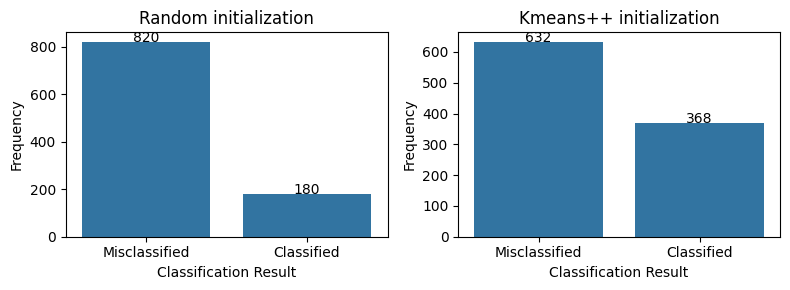

In [11]:
label_map = {'0': 'Misclassified', '1': 'Classified'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(x=result_random, ax=ax1)
ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
ax1.set_xlabel("Classification Result")
ax1.set_ylabel("Frequency")
ax1.set_title("Random initialization")
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

sns.countplot(x=result_plus, ax=ax2)
ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])
ax2.set_xlabel("Classification Result")
ax2.set_ylabel("Frequency")
ax2.set_title("Kmeans++ initialization")
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

plt.tight_layout()
plt.show()
